## Q1 Calculus Review
#### 1.1 (V0^2)/20

## Q2 Image Manipulation
#### 2.1 reads in the provided u2dark.png photo and converts it to grayscale using rgb2gray. Use the script and your own code to calculate the following statistics: What is the average pixel value of the resulting grayscale image? What are the min and max values?

In [10]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

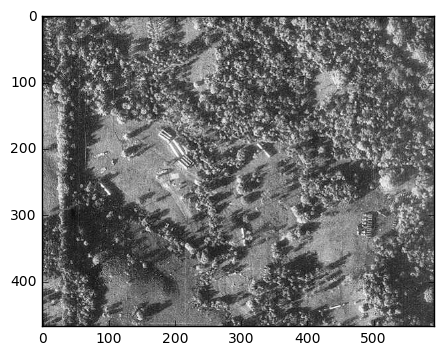

In [9]:
img = imread('u2dark.png', as_grey = True)
plt.imshow(img, cmap='gray')

In [24]:
mean_val = np.mean(img)*255
min_val = np.min(img)*255
max_val = np.max(img)*255
print('mean pixel value is:%f'%mean_val)
print('min pixel value is:%f'%min_val)
print('max pixel value is:%f'%max_val)

mean pixel value is:76.962175
min pixel value is:25.000000
max pixel value is:153.000000


#### 2.2 Add an offset and apply a scaling factor to all pixels, so that the minimum pixel value becomes 0 and the max pixel value becomes 255.

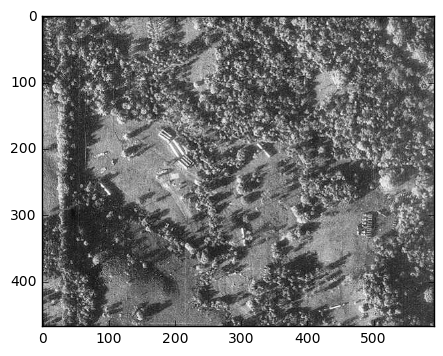

In [29]:
scale = 255/(max_val - min_val)
img_scale = (img*255 - min_val)*scale
plt.imshow(img_scale/255, cmap='gray')

#### 2.3 Next, we would like to double the contrast of the pixels in the middle brightness range. Specifically, take your result from part (b) and replace each pixel’s intensity i with a new intensity i′, where
i′ = 2∗(i−128)+128  
Threshold i′ so that 0 ≤ i′ ≤ 255 (you can use the uint8 function).

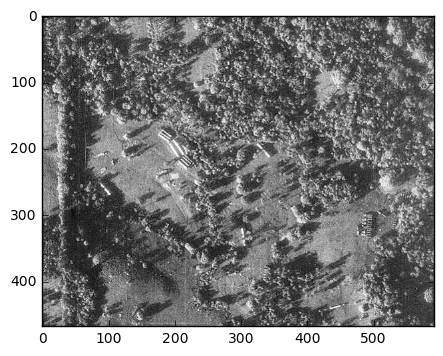

In [30]:
img_contrast = 2*(img_scale-128) + 128
plt.imshow(img_contrast/255, cmap='gray')

## Q3 Edge Detection
#### 3.1 Gradients

(468, 591)


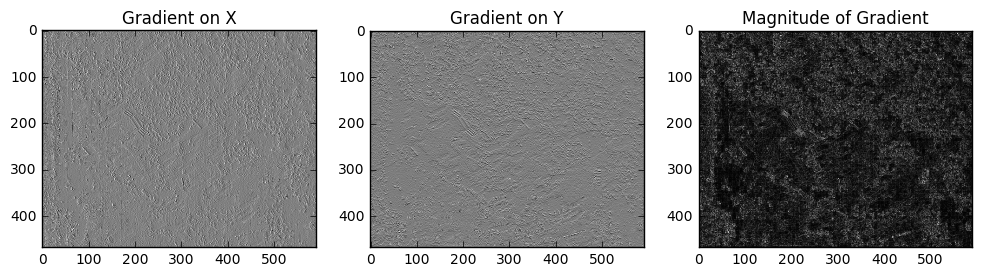

In [83]:
print(img.shape)
y,x = img.shape
x_grad = img[:,1:x]-img[:,0:x-1]
y_grad = img[1:y:,:]-img[0:y-1,:]
magnitude = np.sqrt(y_grad[0:y-1,0:x-1]**2+x_grad[0:y-1,0:x-1]**2)

f = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(x_grad, cmap='gray')
plt.title('Gradient on X')
plt.subplot(132)
plt.imshow(y_grad, cmap='gray')
plt.title('Gradient on Y')
plt.subplot(133)
plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude of Gradient')


#### 3.2 Blur

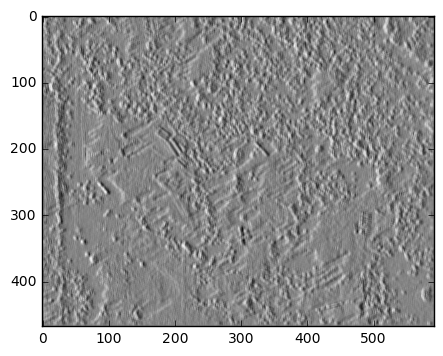

In [82]:
# %%time
height = img.shape[0]
width = img.shape[1]
n=5  # width of the blur

blur = np.zeros((height,width), dtype=float, order='F')
for i in range(height):
    for j in range(width):
        blur[i,j] = sum(sum(x_grad[i:i+n,j:j+n]))/(n*n)

plt.imshow(blur, cmap='gray')

## Q5 SVD for Image Compression
we will explore how to apply Singular Value Decomposition of a matrix to the problem of image compression. SVD decomposes a rectangular matrix M to a three parts.
<img src="SVD.png">
* U — matrix of left singular vectors in the columns  
* Σ — diagonal matrix with singular values  
* V — matrix of right singular vectors in the columns  
SVD in effect involves reconstructing the original matrix as a linear combination of several rank one matrices. A rank one matrix can be expressed as a outer product of two column vectors.  
<img src="SVD2.png">  
Image compression using SVD involves taking advantage of the fact that very few of the singular values are large. Although images from the real world are of full rank, they have low effective rank which means that only few of the singular values of the SVD of images will be large. 

Compression ratio  
= number of digit to store top k results from SVD/number of pixel in original image  
= (k × nrow + k + k × ncol)/(ncol × nrow)

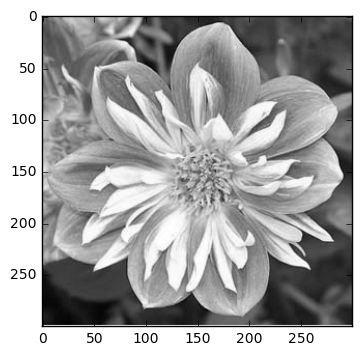

In [124]:
img = imread('flower.bmp', as_grey = True)
plt.imshow(img,cmap ='gray')

In [88]:
from numpy.linalg import svd

In [121]:
def compress_svd(k):
    U,s,V = svd(img)
    compress_img = np.dot(U[:,:k], np.dot(np.diag(s[:k]),V[:k,:]))
    return compress_img, s

In [122]:
def show_compress(k):
    img_shape = img.shape
    compress_img, s = compress_svd(k)
    fig, ax = plt.subplots(1,2,figsize =(8,5))
    ax[0].plot(s)
    compression_ratio = 100*(k*(img_shape[0]+img_shape[1])+k)/(img_shape[0]*img_shape[1])
    ax[1].set_title("compression ration = %.2f"%compression_ratio+'%')
    ax[1].imshow(compress_img,cmap='gray')
    ax[1].axis('off')
    fig.tight_layout()
    

Use ipython interactive widget to explore how the quality of the reconstructed image varies with k.

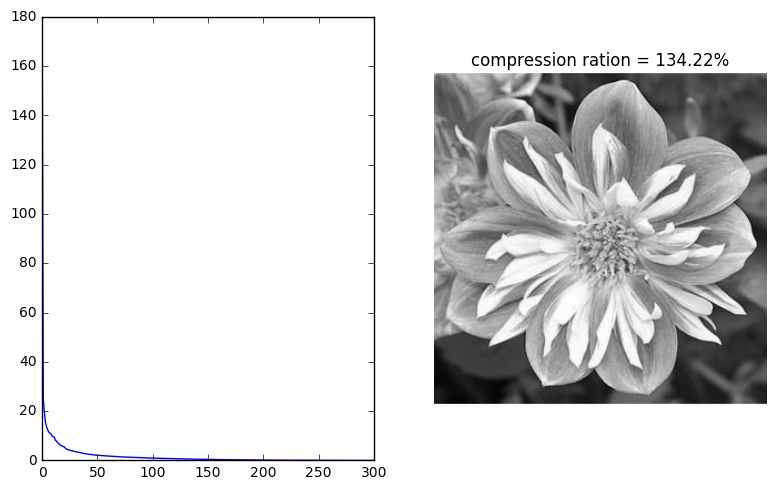

In [123]:
from ipywidgets import interact

interact(show_compress ,  k=(1,300))

#### 5.c
Won't save place when keeping top 200 values. As its compression rate is > 1

In [132]:
def error_svd(k):
    U,s,V = svd(img)
    compress_img = np.dot(U[:,:k], np.dot(np.diag(s[:k]),V[:k,:]))
    error =  np.mean(np.mean(abs(img-compress_img)))
    return error

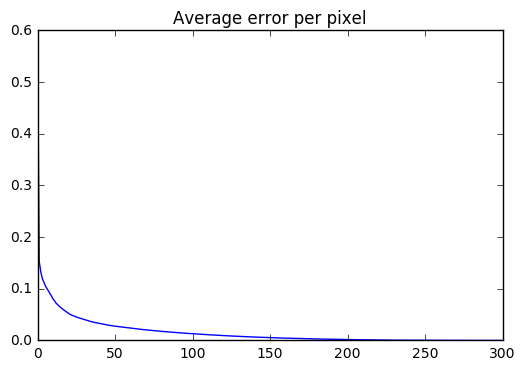

In [140]:
errors = []
for i in range(300):
    errors.append(error_svd(i))

plt.plot(errors)
plt.title('Average error per pixel')

In [157]:
for i in range(1,301):
    img_comp,s = compress_svd(i)
    error = abs(img_comp-img)
    sum_s = sum(s[i:])
    p_list = []
    for y in range(len(img)):
        for x in range(len(img[0])):
            p_list.append(error[y,x]/sum_s)
    print("for k=",i,' p=',np.max(p_list))

for k= 1  p= 0.00172556769026
for k= 2  p= 0.00173933195457
for k= 3  p= 0.00183104731338
for k= 4  p= 0.00167505064778
for k= 5  p= 0.00182297272064
for k= 6  p= 0.00188421566377
for k= 7  p= 0.0021231784886
for k= 8  p= 0.0020787420943
for k= 9  p= 0.00215191737831
for k= 10  p= 0.00218673920581
for k= 11  p= 0.00224985073403
for k= 12  p= 0.00231170823346
for k= 13  p= 0.00240744771177
for k= 14  p= 0.00257771728628
for k= 15  p= 0.00263428121402
for k= 16  p= 0.00276336831783
for k= 17  p= 0.00277848205757
for k= 18  p= 0.00287089016873
for k= 19  p= 0.00282323880136
for k= 20  p= 0.00289037492219
for k= 21  p= 0.00296436726556
for k= 22  p= 0.00276485440051
for k= 23  p= 0.00261538952309
for k= 24  p= 0.00267235896706
for k= 25  p= 0.00279258816789
for k= 26  p= 0.00273181222131
for k= 27  p= 0.00261054403219
for k= 28  p= 0.00237675931425
for k= 29  p= 0.0024183668937
for k= 30  p= 0.00247017555121
for k= 31  p= 0.00242450191753
for k= 32  p= 0.00245354542358
for k= 33  p= 0.0024